<a href="https://colab.research.google.com/github/octavianosilva/data_science/blob/main/Analisando_dados_airbnb_Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tokyo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations).*

In [1]:
# importando as bibliotecas que serão utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# ler o arquivo listing.csv em um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-12-29/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# carregando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.46,1,2
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7222,3,228,2020-01-18,2.31,1,156
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5200,30,93,2019-11-25,0.97,2,180
3,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65833,139.67153,Private room,11000,1,211,2020-03-16,2.24,1,0
4,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74253,139.79730,Private room,30000,1,72,2018-06-17,0.77,2,270


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 11353 entradas e 74 variáveis (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11353
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 20% dos valores nulos.
* A variável `host_name` tem aproximadamente 0,1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.202766
last_review                       0.202766
host_name                         0.001409
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

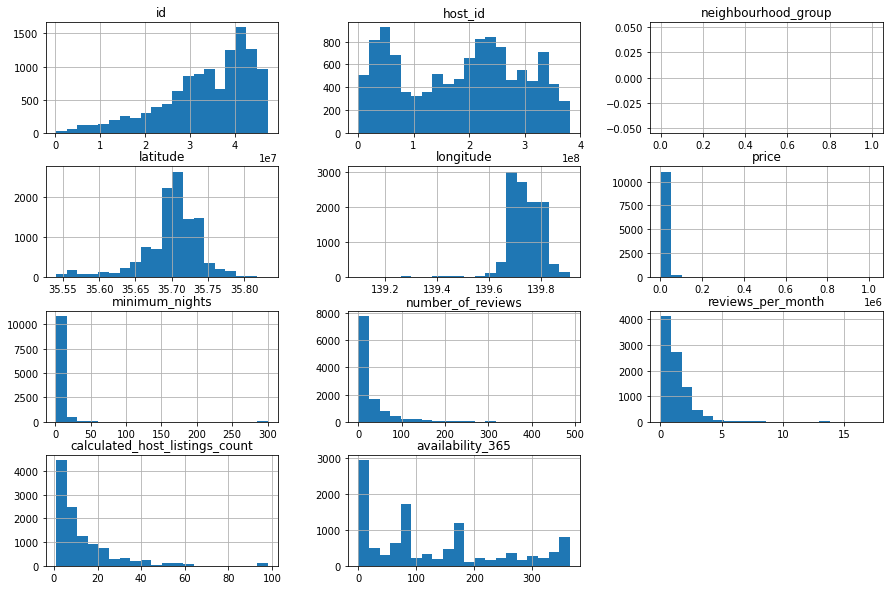

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

Para ajudar na visualização dos preços, será necessário uma conversão de Ienes para Real, que na cotação do dia 15/02/21 são 0,051 real. 

In [7]:
# fazendo a conversão de Ienes para o Real
conversao = 0.051 * df["price"]
df["price"] = conversao

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11353.000000,11353.000000,11353.000000,9051.000000,11353.000000,11353.000000
mean,712.314916,3.765525,25.619572,1.234588,12.811327,127.798467
std,1780.384267,17.663082,41.099224,1.153260,14.874024,117.621476
min,48.450000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,233.121000,1.000000,1.000000,0.420000,3.000000,11.000000
50%,408.000000,1.000000,9.000000,0.990000,8.000000,90.000000
75%,714.000000,2.000000,32.000000,1.710000,17.000000,188.000000
max,51728.586000,300.000000,488.000000,17.290000,98.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 714, porém seu valor máximo é 51728,59.
* A quantidade mínima de disponibilidade durante o ano (`availability_360`) é 0.
* A quantidade máxima do mínimo de noites (`minimum_nights`) é de 300 dias.

#### Boxplot para minimum_nights

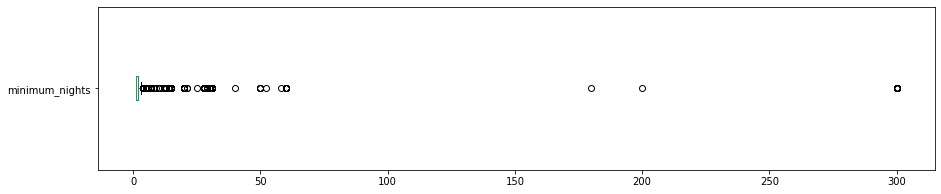

minimum_nights: valores acima de 30:
61 entradas
0.5373%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Analisando, é possível ver que acima dos 30 dias de mínimo de noites, são aproximadamente 0.54% dos dados, ou seja, podemos retirá-los para termos dados mais próximos da realidade.

#### Boxplot para price e availability_360

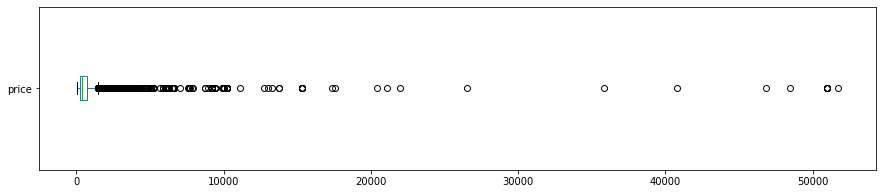


price: valores acima de 1500
908 entradas
7.9979%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

Apenas 8% dos dados estão acima de 1500, assim podemos retirá-los, uma vez que preços acima de R$ 1.500,00 não são atrativos e causam uma discrepância estatística.

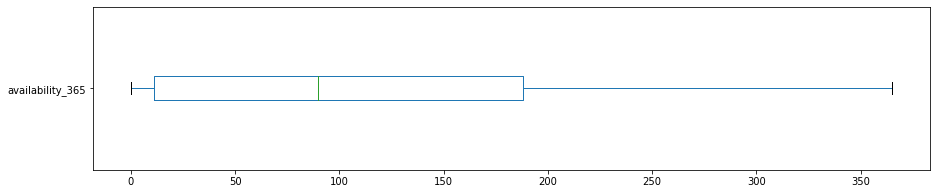


availability_365: valores em quem o número de dias de disponibilidade dentro de 365 dias é 0.
2124 entradas
18.7087%


In [11]:
# availability_365
df.availability_365.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores iguais a 0 para availability_365
print("\navailability_365: valores em quem o número de dias de disponibilidade dentro de 365 dias é 0.")
print("{} entradas".format(len(df[df.availability_365 == 0])))
print("{:.4f}%".format((len(df[df.availability_365 == 0]) / df.shape[0])*100))

Analisando a disponibilidade de dias dentro de 365 dias, vemos que 18.71% dos dados são nulos, então podemos limpá-los uma vez que se o imóvel não está disponível em nenhum momento do ano, não há necessidade de analisá-los.

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights`, `availability_365`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

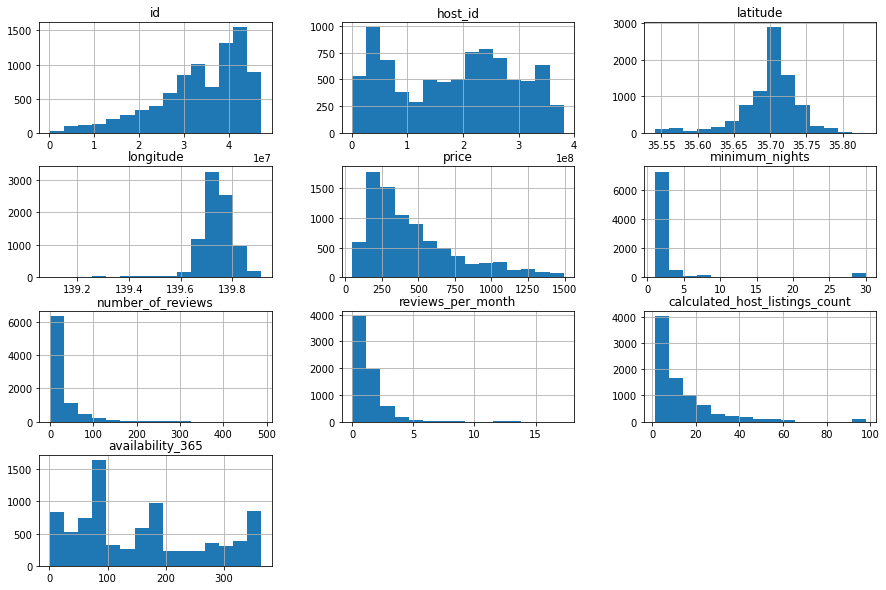

In [12]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.availability_365 == 0].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois é uma coluna de valores nulos
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5920
Private room       1860
Hotel room          364
Shared room         313
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.700012
Private room       0.219936
Hotel room         0.043041
Shared room        0.037011
Name: room_type, dtype: float64

Com essa anásile determinamos que a disponibilidade de imóveis para cada tipo é:

* 70% para apartamentos/casas inteiras;
* 22% para quartos privados;
* 4,3% para quartos de Hoteis;
* 3,7% para quartos compartilhados.

### **Q6. Qual a média do mínimo de noites disponíveis para aluguel (*minimun_nights*)?**

A coluna da variável `minimun_nights` indica o número mínimo de noites que em que o imóvel deve ser alugado.

Vamos calcular uma média para esta variável:

In [50]:
# calculando a média de mínimo de noites
df_clean.minimum_nights.mean()

2.777225966654842

Assim podemos ver que a média do mínimo de noites (*minimum_nights*) é de aproximadamente 3 dias, ou seja, os imóveis em Tokyo disponíveis pelo Airbnb são oferecidos em média por um mínimo de 3 dias.

### **Q7. Qual a localidade mais cara de Tokyo?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [15]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Hamura Shi       803.683500
Hinohara Mura    789.403500
Tachikawa Shi    690.438000
Okutama Machi    646.680000
Mitaka Shi       633.998000
Chiyoda Ku       585.555246
Musashino Shi    561.788182
Shibuya Ku       560.821942
Minato Ku        555.293447
Meguro Ku        533.707031
Name: price, dtype: float64

#### O problema de se usar o agrupamento por média

O problema deste tipo de verificação é a quantidade de imóveis neste bairro, o que pode fazer como que a média de preços nos bairros com pouca disponibilidade disparem e nos dêem informações que não condizem com a realidade.

Como podemos ver a seguir, a região mais cara da análise anterior possui apenas 4 imóveis.

In [16]:
# ver quantidade de imóveis em Hamura Shi
print(df_clean[df_clean.neighbourhood == "Hamura Shi"].shape)

# ver as 4 entradas de Hamura Shi
df_clean[df_clean.neighbourhood == "Hamura Shi"]

(4, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1729,22947785,羽村駅徒歩14分テラス付き素敵なメゾネット！A1,169807146,陽子,Hamura Shi,35.76384,139.32266,Entire home/apt,1075.590,4,3,2020-01-05,0.12,8,264
1748,22987845,JR羽村駅徒歩14分 凝った内装でゆったり2DK/B3,169807146,陽子,Hamura Shi,35.76437,139.32514,Entire home/apt,888.879,5,1,2018-04-10,0.03,8,264
1751,22988271,羽村駅徒歩14分の2DK！自然派にもオススメB5,169807146,陽子,Hamura Shi,35.76321,139.32528,Entire home/apt,1092.879,4,6,2020-02-19,0.30,8,343
6132,37401769,Hamura JR 1.5km Oldfashione dome Tokyo suburb,38919757,Max Masaking,Hamura Shi,35.75216,139.31529,Entire home/apt,157.386,1,11,2020-12-16,1.10,6,88


#### Plotando os imóveis por sua Latitude e Longitude com relção aos preços

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

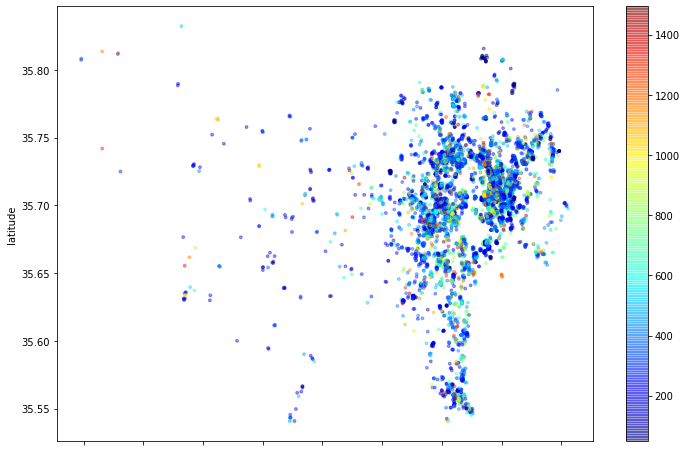

In [17]:
# plotar os imóveis pela latitude-longitude e sua relação de preços
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

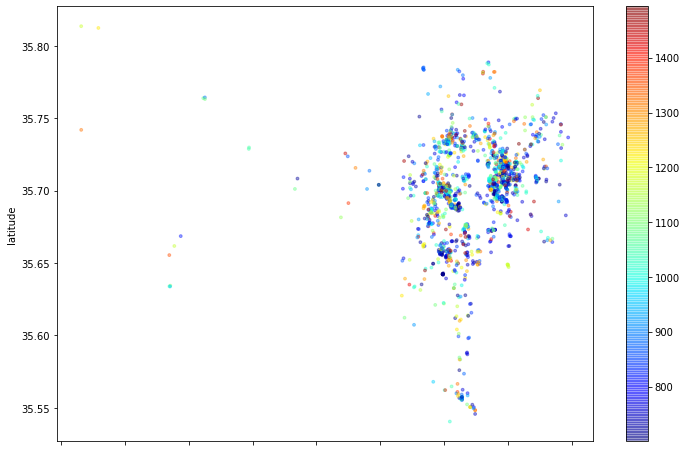

In [18]:
# Para valores acima de R$ 700,00

# criando a variável que receberá os valores acima de 700:
df_7 = df_clean.copy()
df_7.drop(df_clean[df_clean.price < 700].index, axis=0, inplace=True)

# plotando:
df_7.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_7['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

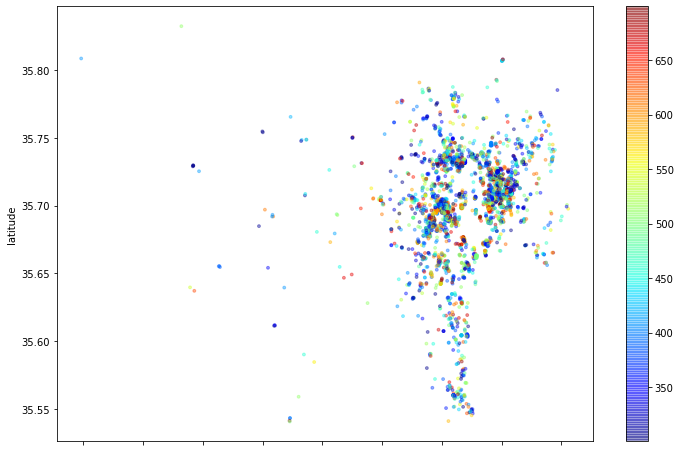

In [19]:
# Para valores entre de R$ 300,00 e R$ 700,00

# criando a variável que receberá os valores entre 300 e 700:
df_3a7 = df_clean.copy()
df_3a7.drop(df_clean[df_clean.price < 300].index, axis=0, inplace=True)
df_3a7.drop(df_clean[df_clean.price > 700].index, axis=0, inplace=True)

# plotando:
df_3a7.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_3a7['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

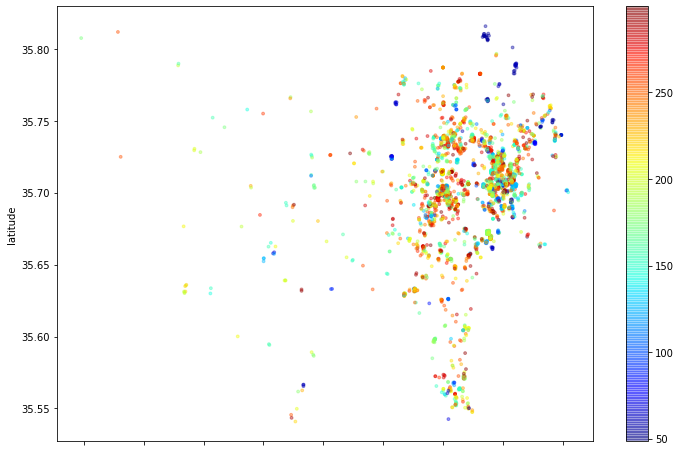

In [20]:
# Para valores abaixo de R$ 300,00

# criando a variável que receberá os valores abaixo de 300:
df_3 = df_clean.copy()
df_3.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)

# plotando:
df_3.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_3['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Observando os gráficos para comparar os preços, pode-se perceber que em Tokyo, a região central não pode ser vista como a mais cara, uma vez que há uma grande concentração tanto de preços mais baratos como também os mais caros.

#### Plotando os imóveis em suas respectivas regiões

In [21]:
# mostrar a porcentagem de imóveis disponíveis por região:
df_clean["neighbourhood"].value_counts() / df_clean.shape[0]

Shinjuku Ku            0.197470
Taito Ku               0.149817
Sumida Ku              0.097671
Toshima Ku             0.087856
Shibuya Ku             0.054629
Chuo Ku                0.040322
Minato Ku              0.036538
Ota Ku                 0.034055
Katsushika Ku          0.029325
Nakano Ku              0.028024
Setagaya Ku            0.026369
Kita Ku                0.025777
Arakawa Ku             0.023649
Suginami Ku            0.021048
Shinagawa Ku           0.018210
Koto Ku                0.017619
Edogawa Ku             0.016791
Itabashi Ku            0.016673
Adachi Ku              0.016081
Chiyoda Ku             0.014426
Bunkyo Ku              0.011706
Meguro Ku              0.007568
Nerima Ku              0.007095
Hachioji Shi           0.002601
Machida Shi            0.002601
Nishitokyo Shi         0.001655
Hino Shi               0.001419
Musashino Shi          0.001301
Kodaira Shi            0.001064
Tama Shi               0.001064
Higashimurayama Shi    0.000946
Akiruno 

Analisando as porcentagens podemos ver que 66,43% dos imóveis se concentram na região central de Tokyo.

In [22]:
# calculando o número de imóveis em cada região:
df_clean["neighbourhood"].value_counts()

Shinjuku Ku            1670
Taito Ku               1267
Sumida Ku               826
Toshima Ku              743
Shibuya Ku              462
Chuo Ku                 341
Minato Ku               309
Ota Ku                  288
Katsushika Ku           248
Nakano Ku               237
Setagaya Ku             223
Kita Ku                 218
Arakawa Ku              200
Suginami Ku             178
Shinagawa Ku            154
Koto Ku                 149
Edogawa Ku              142
Itabashi Ku             141
Adachi Ku               136
Chiyoda Ku              122
Bunkyo Ku                99
Meguro Ku                64
Nerima Ku                60
Hachioji Shi             22
Machida Shi              22
Nishitokyo Shi           14
Hino Shi                 12
Musashino Shi            11
Kodaira Shi               9
Tama Shi                  9
Higashimurayama Shi       8
Akiruno Shi               8
Kokubunji Shi             7
Chofu Shi                 7
Kunitachi Shi             6
Mitaka Shi          

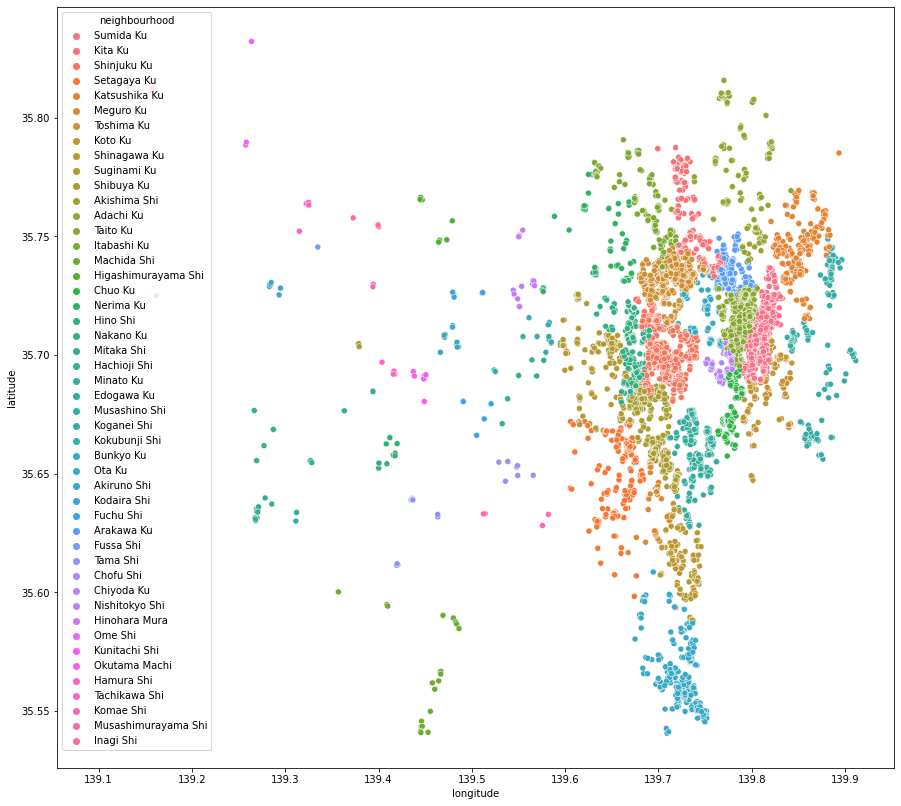

In [49]:
# plotando o mapa
plt.figure(figsize=(15,14))
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood", data=df_clean)

Mapa da região de Tokyo
<img alt="Analisando Airbnb" width="130%" src="https://www.almadeviajante.com/wp-content/uploads/mapa-bairros-toquio.gif">

## Conclusões

Nesta pesquisa foi feita uma análise superficial na base de dados do Airbnb, mas foi possível identificar a existência de *outliers* em algumas varíaveis.

Usando uma média de preços para se obter a localidade mais cara de Tokyo, percebeu-se que a quantidade de imóveis disponíveis por regiões exercem grande peso nesta visualização, gerando um problema em que o resultado estatístico não condiz com a realidade pela falta de imóveis em algumas regiões. 

O *dataset* utilizado é uma versão resumida, ideal para uma análise inicial.
Recomenda-se que em uma próxima análise exploratória, seja utilizado o *dataset* completo, com 74 atributos disponíveis.